<a href="https://colab.research.google.com/github/KarolisLipinskas/AI_DataFrames/blob/main/Lung_Cancer_Detection/LungCancerDetection_Decision_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

#<font color='Dark Maroon'><b>The details of this Notebook are explained in this YouTube video Neural Network</b></font>
<center>

  <a href="https://www.youtube.com/watch?v=fkoHrIGxIpA" target="_blank">

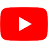

  </a>
</center>

*Algirdas Laukaitis*

##<font color='Dark Maroon'>AdventureWorks DW using TensorFlow <b>Decision Forests</b></font>


[AdventureWorks DW schema](https://github.com/aalgirdas/AdventureWorksDW/blob/main/AdventureWorksDW2008.png)

[AdventureWorks schema](https://github.com/aalgirdas/AdventureWorksDW/blob/main/AdventureWorks2008.png?raw=true)


<br><br>

---
#<font color='	Dark Maroon'>Step 1. From a csv data file that is available online to 2 DataFrame tables:  training and test</font>



## 1.1 Let’s load the vTargetMail.csv data into a dataframe from GitHub.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/KarolisLipinskas/AI_DataFrames/main/Lung_Cancer_Detection/survey_lung_cancer.csv', sep=',')
print("The dataframe has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0});

The dataframe has 309 rows and 16 columns.


## 1.2 Next, we will examine the first row of the data to determine which information is relevant to our task.

In [2]:
print(df.iloc[10]) # The first row of the DataFrame df.

GENDER                    F
AGE                      61
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC_DISEASE           2
FATIGUE                   2
ALLERGY                   1
WHEEZING                  2
ALCOHOL_CONSUMING         1
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                1
LUNG_CANCER               1
Name: 10, dtype: object


## 1.3 We remove attributes that we don’t require
> *And we rename some attributes because we want to reuse the code snippets from official TensorFlow tutorials. Renaming an attribute is much easier than rewriting code.*

In [3]:
#df.drop(columns=["CustomerKey", "GeographyKey", "CustomerAlternateKey","Title" ,"FirstName","MiddleName","LastName","NameStyle","BirthDate","Suffix", "EmailAddress" ,"SpanishEducation","FrenchEducation","SpanishOccupation","FrenchOccupation","AddressLine1","AddressLine2","Phone","DateFirstPurchase"], inplace=True)
#df.rename(columns = {'BikeBuyer':'target'}, inplace = True)
print(df.iloc[0])



GENDER                    M
AGE                      69
SMOKING                   1
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             1
CHRONIC_DISEASE           1
FATIGUE                   2
ALLERGY                   1
WHEEZING                  2
ALCOHOL_CONSUMING         2
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                2
LUNG_CANCER               1
Name: 0, dtype: object


## 1.4 Split the DataFrame into training and test sets

When we teach a machine learning model, we want to make sure it can perform well on new data that it has not seen before. To do this, we typically divide our data into three sets: the training set, the validation set, and the test set.

The training set is used to teach the model how to make predictions. The validation set is used to fine-tune the model to make it work better and to avoid a problem called overfitting. Overfitting happens when the model is too closely trained on the training data and doesn't perform well on new data. (But for Decision Forests we don't need validation set) The test set is used to check how well the model performs on new data after it has been trained and fine-tuned.



In [4]:
import numpy as np

train, test = np.split(df.sample(frac=1), [ int(0.9*len(df))])  # The dataset is in a single pandas DataFrame. Split it into training, and test sets using a, for example, 90:10 ratio, respectively.
print(len(train), 'training examples')
print(len(test), 'test examples')

278 training examples
31 test examples


<br><br>

---


#<font color='	Dark Maroon'>Step 2. From DataFrame table to TensorFlow dataset data</font>

## Import TensorFlow and other libraries

In [5]:
%%capture
!pip install tensorflow_decision_forests==1.4.0
#!pip install tensorflow_decision_forests

In [7]:
import tensorflow_decision_forests as tfdf

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label='LUNG_CANCER')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label='LUNG_CANCER')


<br><br>

---


#<font color='	Dark Maroon'>Step 3. Model</font>

In [8]:
model_1 = tfdf.keras.RandomForestModel(num_trees=50 , max_depth=10 ) # num_trees=100 , max_depth=15 , verbose=0

Use /tmp/tmp2b8m7wvt as temporary training directory


<br><br>

---


#<font color='Dark Maroon'>Step 4. Train and evaluate the model</font>

<br>

##<font color='Dark Maroon'>Train 🏃‍♂️</font>

In [9]:

model_1.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:08.122532. Found 278 examples.
Training model...
Model trained in 0:00:00.055841
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


<br>


##<font color='Dark Maroon'>Evaluate ⚖️</font>

In [10]:
model_1.compile(metrics=['accuracy'])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print(f'{evaluation["accuracy"]:.4f}')



1/1 [==============================] - 1s 690ms/step - loss: 0.0000e+00 - accuracy: 0.9677
0.9677


<br>


##<font color='Dark Maroon'>Plotting the training logs 🧾</font>

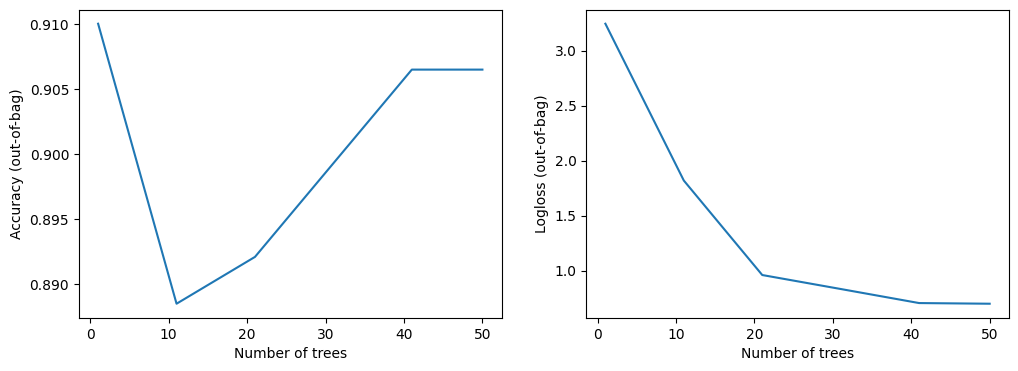

In [11]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

<br>




##<font color='Dark Maroon'>Let's choose one tree 🌲 from the forest (tree_idx=...) and plot the model</font>

In [12]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=15) ## The decision tree number is defined by the tree_idx=... parameter


<br><br>

---


#<font color='Dark Maroon'> Step 5. Perform inference 🛠</font>

##<font color='Dark Maroon'> Save 💾 </font>

In [13]:
model_1.save('CancerDetection_RandomForestModel_trees50')

##<font color='Dark Maroon'> Load ⚙️</font>

In [14]:
import tensorflow as tf
reloaded_model = tf.keras.models.load_model('CancerDetection_RandomForestModel_trees50')

##<font color='Dark Maroon'> New data  🗃️</font>

In [15]:
sample1 = {
    'GENDER': 'M',
    'AGE': 70,
    'SMOKING': 2,
    'YELLOW_FINGERS': 2,
    'ANXIETY': 2,
    'PEER_PRESSURE': 1,
    'CHRONIC_DISEASE': 1,
    'FATIGUE': 2,
    'ALLERGY': 1 ,
    'WHEEZING': 2,
    'ALCOHOL_CONSUMING': 2,
    'COUGHING': 2,
    'SHORTNESS_OF_BREATH': 2,
    'SWALLOWING_DIFFICULTY': 2,
    'CHEST_PAIN': 2,
}

sample2 = {
    'GENDER': 'M',
    'AGE': 30,
    'SMOKING': 1,
    'YELLOW_FINGERS': 1,
    'ANXIETY': 2,
    'PEER_PRESSURE': 1,
    'CHRONIC_DISEASE': 1,
    'FATIGUE': 1,
    'ALLERGY': 2,
    'WHEEZING': 1,
    'ALCOHOL_CONSUMING': 1,
    'COUGHING': 1,
    'SHORTNESS_OF_BREATH': 1,
    'SWALLOWING_DIFFICULTY': 1,
    'CHEST_PAIN': 1,
}


##<font color='Dark Maroon'> Predict  🔮</font>

In [16]:
new_observation_df = pd.DataFrame([sample1])
new_observation_ds = tfdf.keras.pd_dataframe_to_tf_dataset(new_observation_df)
predictions = model_1.predict(new_observation_ds)
print(predictions)

new_observation_df = pd.DataFrame([sample2])
new_observation_ds = tfdf.keras.pd_dataframe_to_tf_dataset(new_observation_df)
predictions = model_1.predict(new_observation_ds)
print(predictions)

1/1 [==============================] - 0s 122ms/step
[[0.9799996]]
1/1 [==============================] - 0s 93ms/step
[[0.61999995]]


In [ ]:
#predictions = reloaded_model.predict(test_ds)


<br><br><br><br>

---
---

#<font color='Dark Maroon'> Visualizing TensorFlow Decision Forest Trees with dtreeviz
</font>

In [17]:
%%capture
!pip install -q -U dtreeviz

In [18]:
import dtreeviz

from matplotlib import pyplot as plt
from IPython import display

# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

display.set_matplotlib_formats('retina') # generate hires plots

<ipython-input-18-3c53b8155882>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


## Display decision tree

In [20]:
AdventDW_features = [f.name for f in model_1.make_inspector().features()]
viz_cmodel = dtreeviz.model(model_1,
                           tree_index=0,
                           X_train=train[AdventDW_features],
                           y_train=train['LUNG_CANCER'],
                           feature_names=AdventDW_features,
                           target_name='LUNG_CANCER',
                           class_names=['No','Yes'])

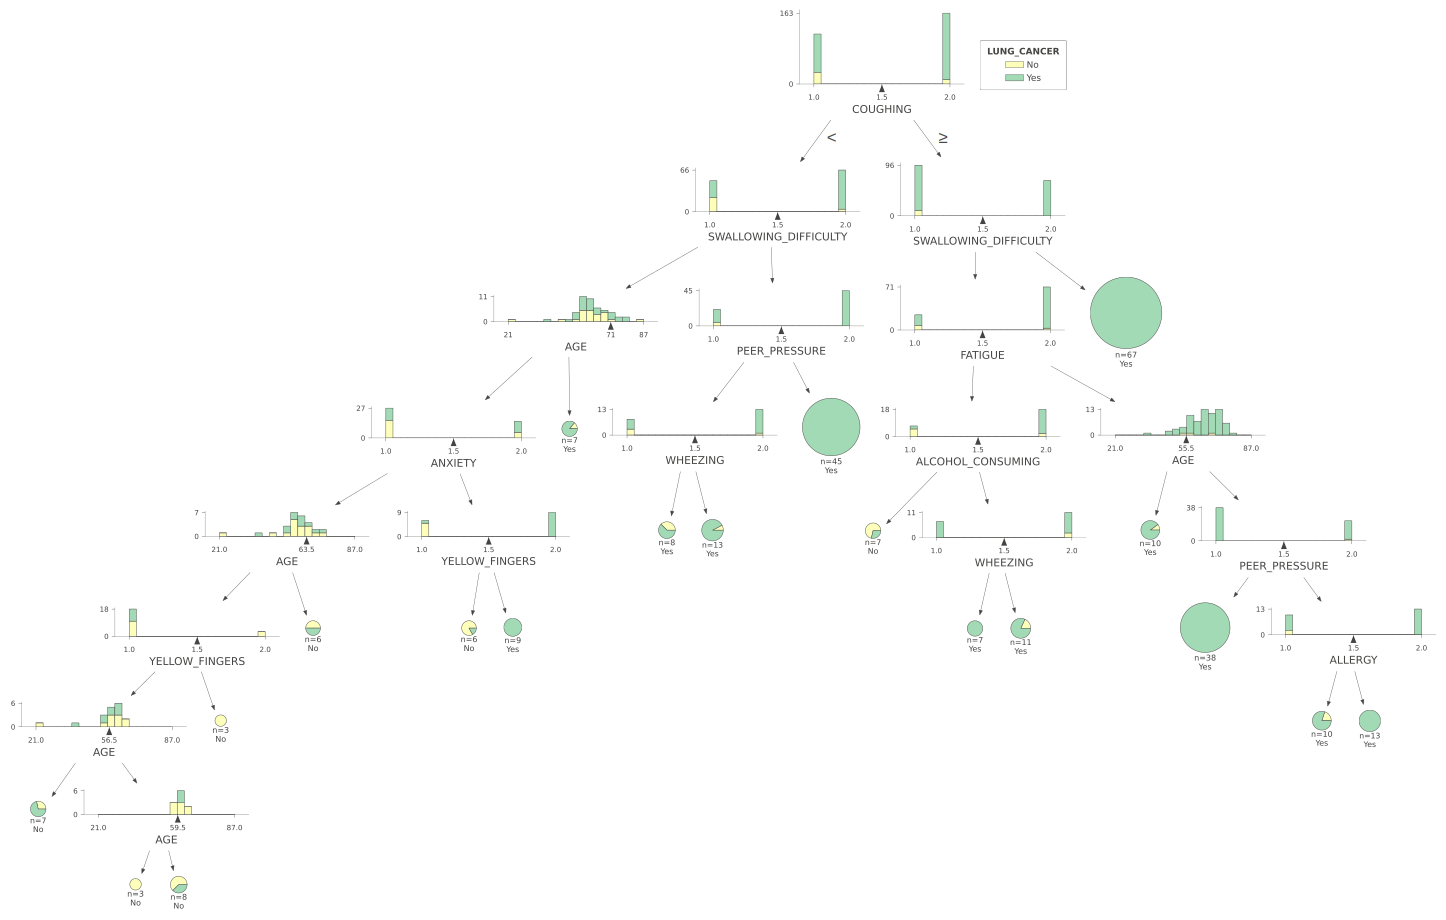

In [21]:
viz_cmodel.view(scale=1.2)

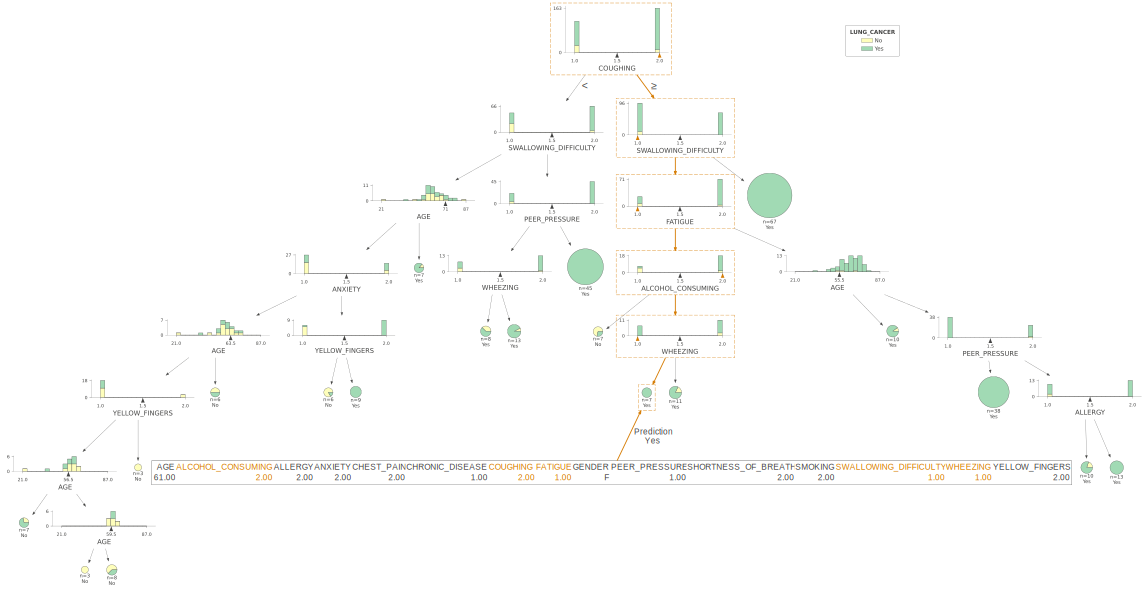

In [22]:
x = train[AdventDW_features].iloc[20]
viz_cmodel.view(x=x, scale=.75)